# Import

In [1]:
%load_ext autoreload
%autoreload 2

import fastai
from fastai import *
from fastai.vision import *
from fastai.vision.gan import *

In [2]:
fastai.__version__

'1.0.57'

# Config

In [3]:
lesson_dir_path = Path('lesson7-wgan')

In [4]:
path = untar_data(URLs.LSUN_BEDROOMS)

# Lesson

In [5]:
def get_data(bs, size):
    return (GANItemList.from_folder(path, noise_sz=100)
               .split_none()
               .label_from_func(noop)
               .transform(tfms=[[crop_pad(size=size, row_pct=(0,1), col_pct=(0,1))], []], size=size, tfm_y=True)
               .databunch(bs=bs)
               .normalize(stats = [torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])], do_x=False, do_y=True))

In [6]:
data = get_data(128, 64)

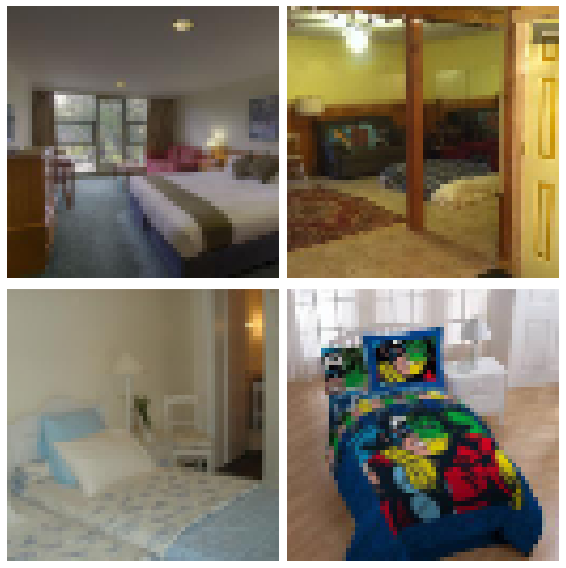

In [7]:
data.show_batch(rows=2)

In [8]:
generator = basic_generator(in_size=64, n_channels=3, n_extra_layers=1)
critic    = basic_critic   (in_size=64, n_channels=3, n_extra_layers=1)

In [9]:
learn = GANLearner.wgan(data, generator, critic, switch_eval=False,
                        opt_func = partial(optim.Adam, betas = (0.,0.99)), wd=0.)

epoch,train_loss,valid_loss,gen_loss,disc_loss,time
0,-0.801349,#na#,0.591744,-1.067725,05:42
1,-0.702187,#na#,0.510300,-0.945123,05:42
2,-0.738011,#na#,0.522893,-1.006577,05:44
3,-0.705404,#na#,0.505007,-0.943548,05:46
4,-0.598294,#na#,0.483444,-0.820937,05:48
5,-0.605922,#na#,0.451979,-0.833546,05:49
6,-0.561359,#na#,0.427461,-0.753504,05:50
7,-0.554142,#na#,0.385781,-0.739114,05:57
8,-0.511920,#na#,0.365278,-0.699709,06:08
9,-0.485154,#na#,0.350459,-0.650162,06:05


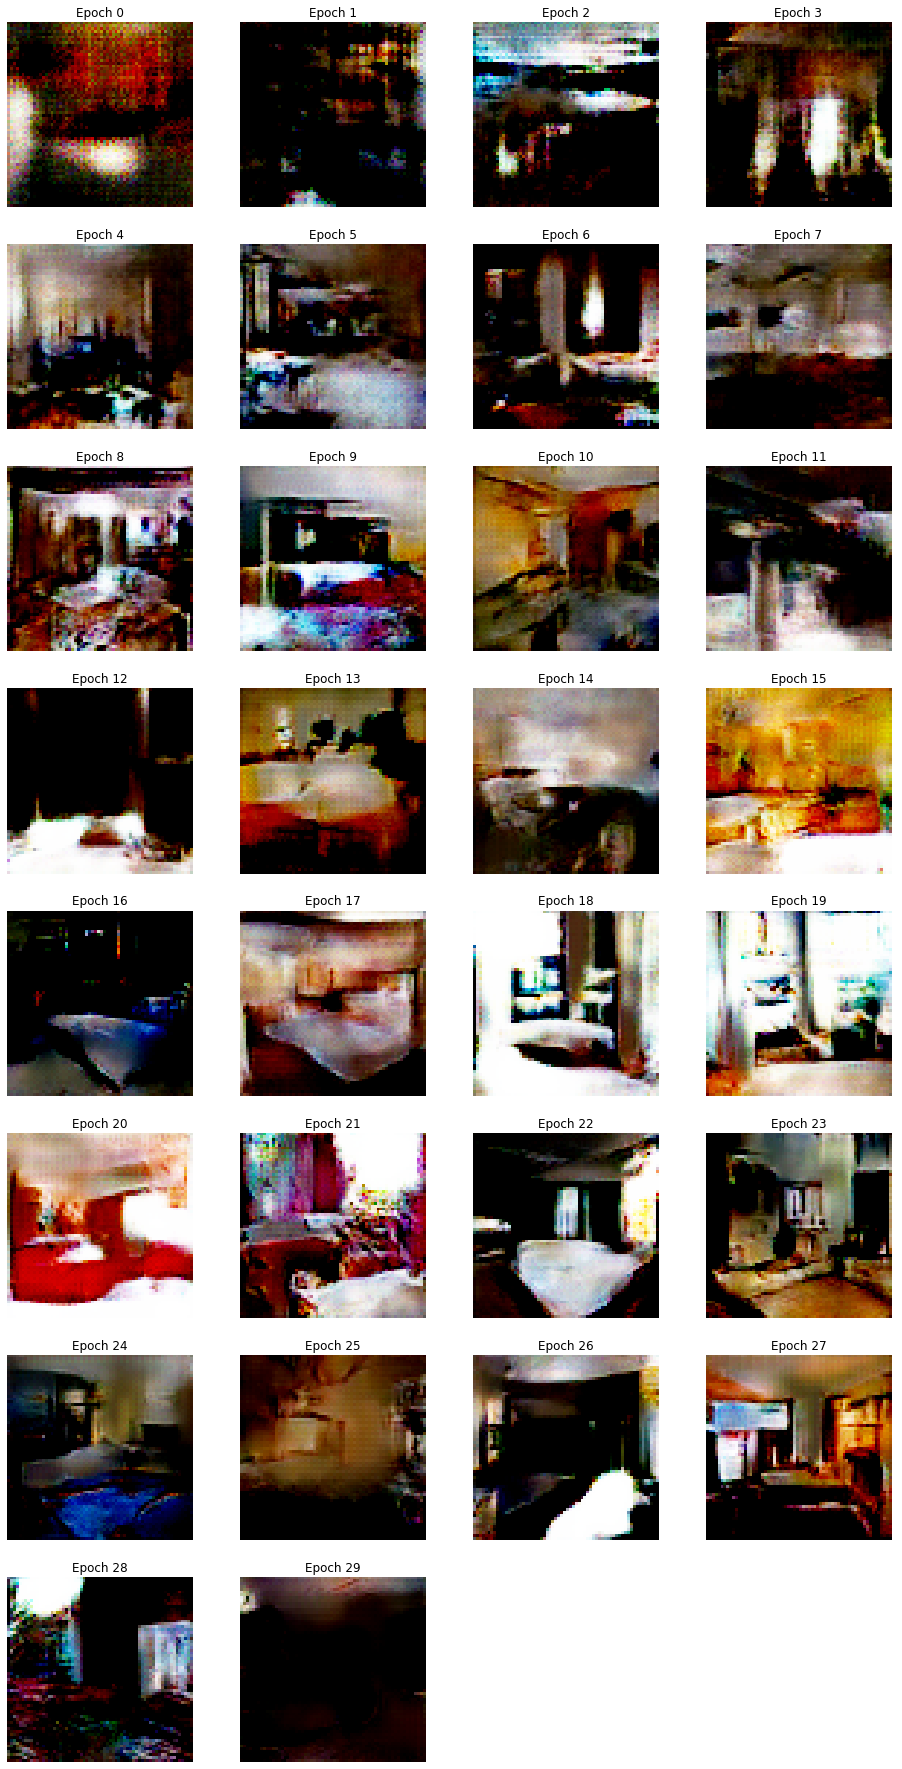

In [10]:
learn.fit(30,2e-4)

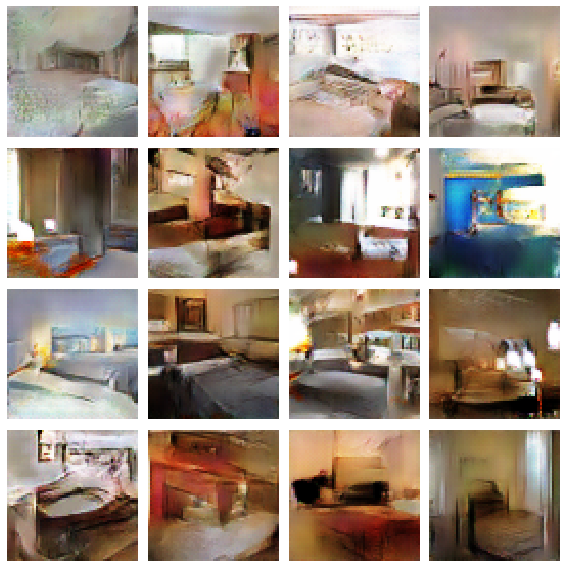

In [12]:
learn.gan_trainer.switch(gen_mode=True)
learn.show_results(ds_type=DatasetType.Train, rows=4, figsize=(8,8))

Looks roomish to me...